In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
dataset = pd.read_csv('CarPrice_Assignment.csv')

In [10]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


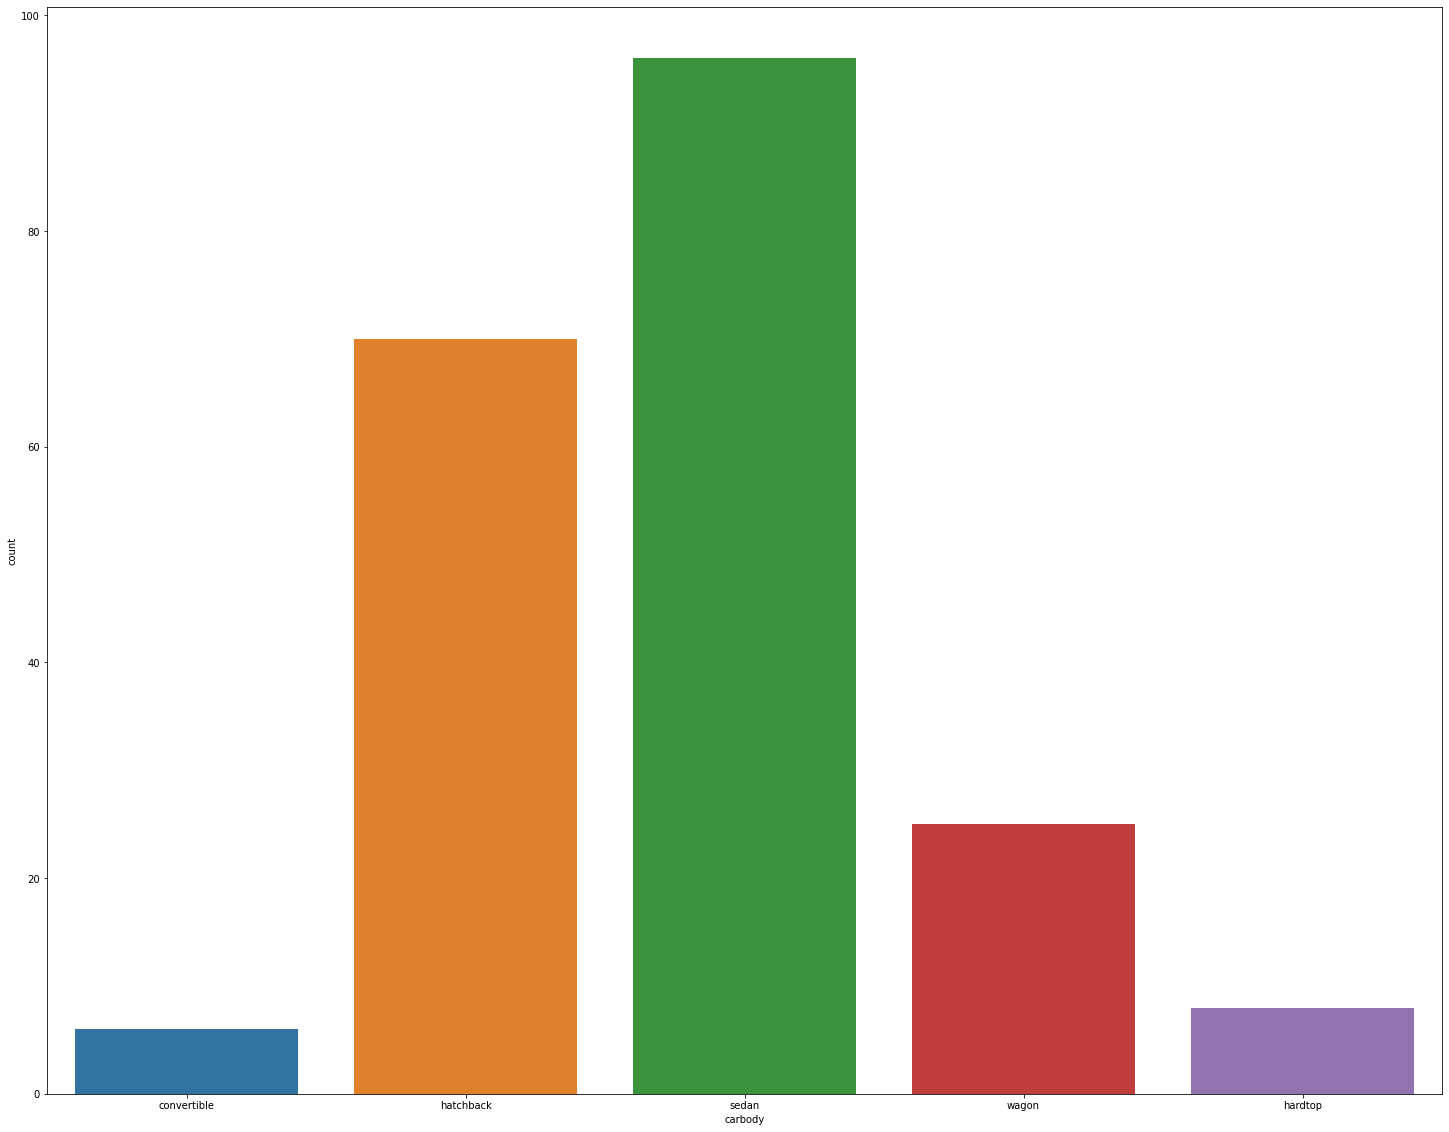

In [11]:
plt.figure(figsize=(25,20))
sns.countplot(dataset['carbody'])

In [12]:
#Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['CarName']=encoder.fit_transform(dataset['CarName'])
dataset['fuelsystem']=encoder.fit_transform(dataset['fuelsystem'])
dataset['cylindernumber']=encoder.fit_transform(dataset['cylindernumber'])
dataset['enginetype']=encoder.fit_transform(dataset['enginetype'])
dataset['enginelocation']=encoder.fit_transform(dataset['enginelocation'])
dataset['drivewheel']=encoder.fit_transform(dataset['drivewheel'])
dataset['carbody']=encoder.fit_transform(dataset['carbody'])
dataset['doornumber']=encoder.fit_transform(dataset['doornumber'])
dataset['aspiration']=encoder.fit_transform(dataset['aspiration'])
dataset['fueltype']=encoder.fit_transform(dataset['fueltype'])

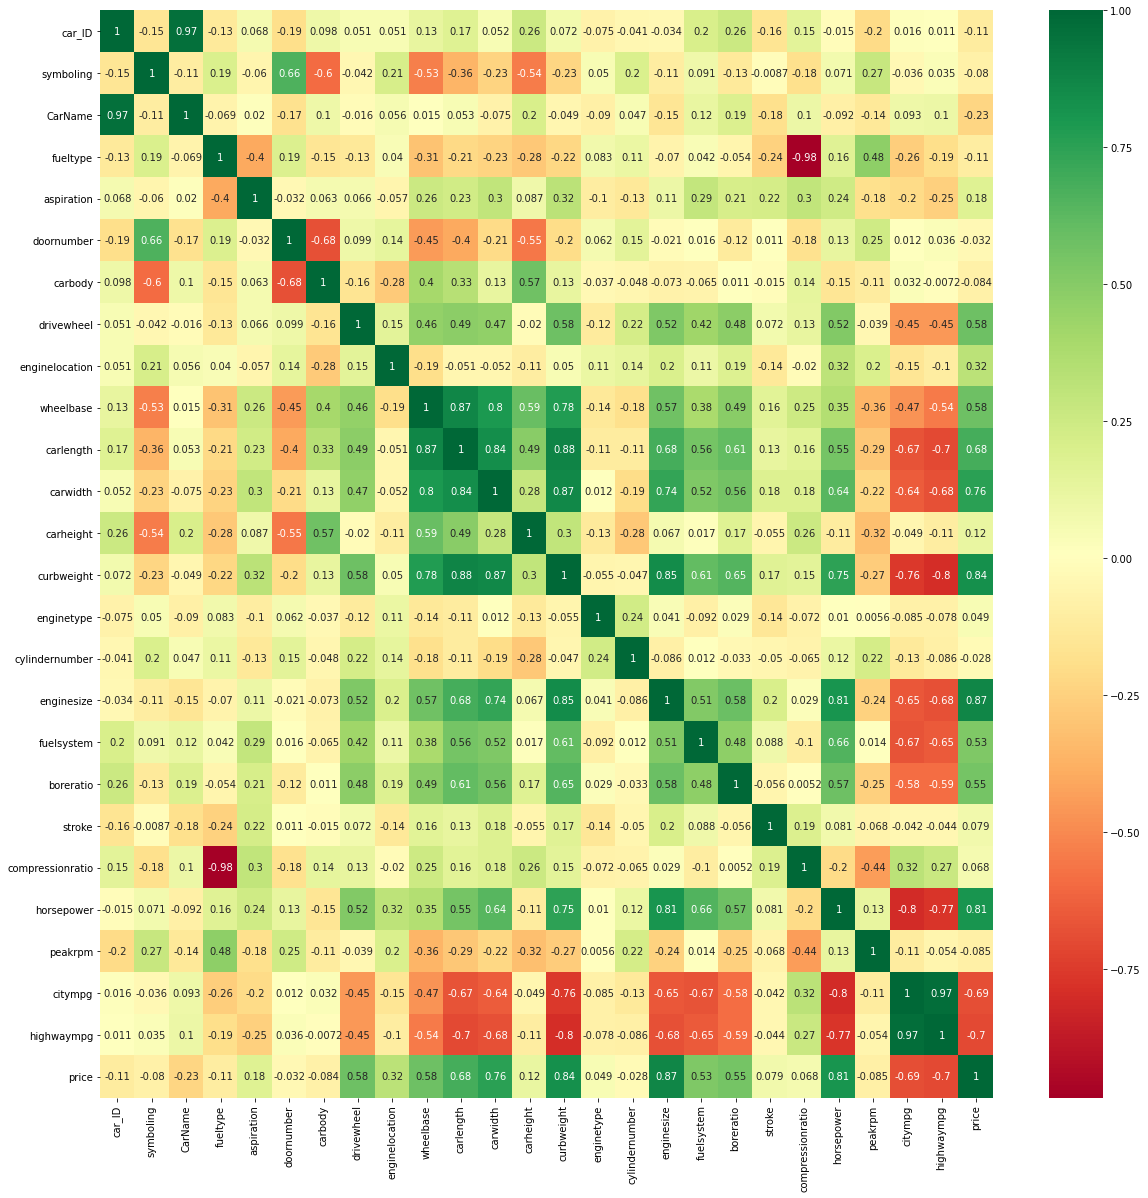

In [13]:

plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")

In [14]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 25].values

In [15]:
#Splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 7)


In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = regressor.predict(x_test)

print("Train Accuracy:", regressor.score(x_train, y_train))
print("Test Accuracy:", regressor.score(x_test, y_test))

Train Accuracy: 0.9070474120739019
Test Accuracy: 0.8186437308757095
